In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from epam.sequences import translate_sequences

In [42]:
pcp_df = pd.read_csv("/Users/matsen/re/epam/_ignore/data/wyatt-10x-1p5m_pcp_2023-10-07.csv")
pcp_df = pd.read_csv("/Users/matsen/re/epam/_ignore/data/shmoof_edges_11-Jan-2023_NoNode0_iqtree_K80+R_masked.csv")

# rename the v_call column to v_gene
pcp_df = pcp_df.rename(columns={"v_call": "v_gene"})

# drop first column (index)
pcp_df = pcp_df.drop(pcp_df.columns[0], axis=1)

pcp_df

,sample_id,family,parent,child,branch_length,v_gene,v_int_start,v_int_end,v_start_pos,v_diff
0,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.965000e-07,IGHV4,65,293,65,0
1,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.965000e-07,IGHV4,65,293,65,0
2,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,6.856857e-03,IGHV4,65,293,65,0
3,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1.378499e-02,IGHV4,65,293,65,0
4,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.965000e-07,IGHV4,65,293,65,0
...,...,...,...,...,...,...,...,...,...,...
84317,326713,7218,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1.008400e-06,IGHV3,65,294,63,0
84318,326713,7218,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,3.446953e-03,IGHV3,65,294,63,0
84319,326713,7218,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,6.921136e-03,IGHV3,65,294,63,0
84320,326713,7218,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,6.907990e-03,IGHV3,65,294,63,0


In [43]:
def mutation_vector_of(parent, child):
    return np.array(list(parent)) != np.array(list(child))

def mutation_column_of(col1, col2):
    return [mutation_vector_of(p, c) for p, c in zip(col1, col2)]

pcp_df["nt_mutations"] = mutation_column_of(pcp_df["parent"], pcp_df["child"])

pcp_df["nt_mutation_count"] = [np.sum(x) for x in pcp_df["nt_mutations"]]

pcp_df

,sample_id,family,parent,child,branch_length,v_gene,v_int_start,v_int_end,v_start_pos,v_diff,nt_mutations,nt_mutation_count
0,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.965000e-07,IGHV4,65,293,65,0,"[False, False, False, False, False, False, Fal...",0
1,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.965000e-07,IGHV4,65,293,65,0,"[False, False, False, False, False, False, Fal...",0
2,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,6.856857e-03,IGHV4,65,293,65,0,"[False, False, False, False, False, False, Fal...",2
3,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1.378499e-02,IGHV4,65,293,65,0,"[False, False, False, False, False, False, Fal...",4
4,316188,1810,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,9.965000e-07,IGHV4,65,293,65,0,"[False, False, False, False, False, False, Fal...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
84317,326713,7218,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,1.008400e-06,IGHV3,65,294,63,0,"[False, False, False, False, False, False, Fal...",0
84318,326713,7218,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,3.446953e-03,IGHV3,65,294,63,0,"[False, False, False, False, False, False, Fal...",1
84319,326713,7218,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,6.921136e-03,IGHV3,65,294,63,0,"[False, False, False, False, False, False, Fal...",2
84320,326713,7218,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,6.907990e-03,IGHV3,65,294,63,0,"[False, False, False, False, False, False, Fal...",2


In [51]:
high_mut_df = pcp_df[pcp_df["nt_mutation_count"] > 20]

# filter out the sequences that have at least 4 consecutive mutations, i.e. trues in the nt_mutations column
high_mut_df = high_mut_df[high_mut_df["nt_mutations"].apply(lambda x: not np.any(np.convolve(x, np.ones(4), mode="valid") == 4))]

len(high_mut_df)

502

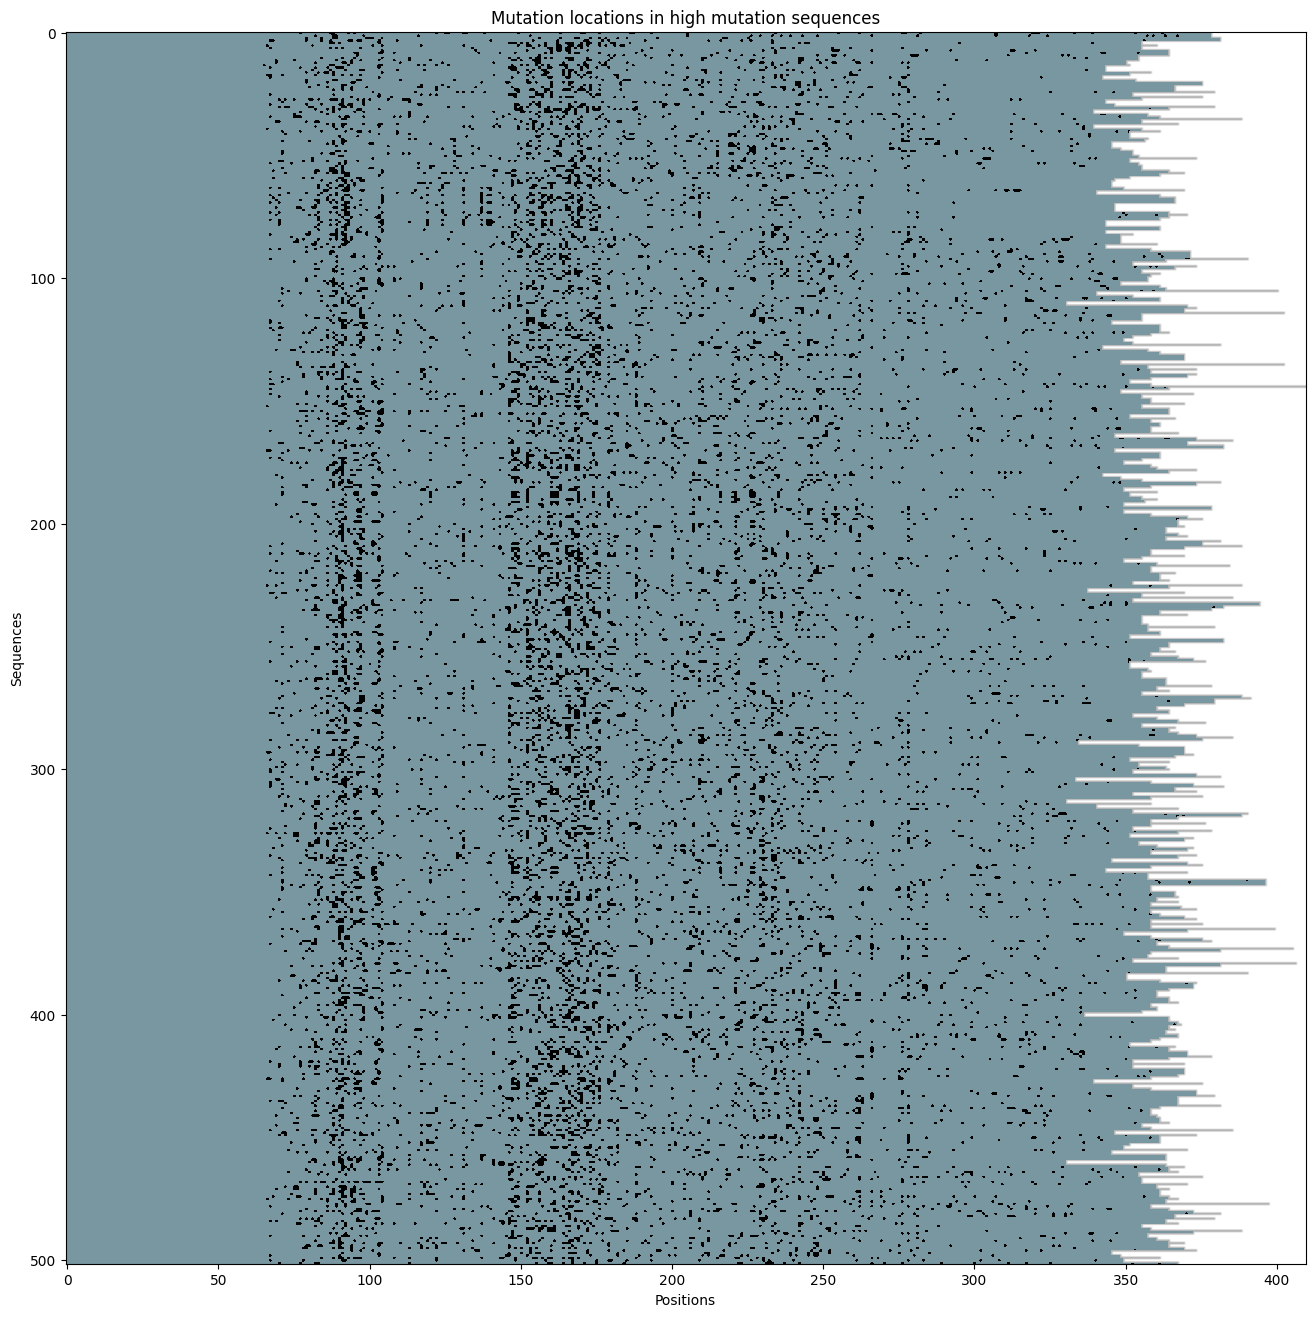

In [52]:
# Find the maximum sequence length
max_len = high_mut_df['nt_mutations'].apply(len).max()

# Initialize a 2D NumPy array with NaNs
arr = np.full((len(high_mut_df), max_len), np.nan)

# Fill in the values
for i, row in enumerate(high_mut_df['nt_mutations']):
    arr[i, :len(row)] = row

plt.figure(figsize=(16, 16))

# Define the colormap: white for NaN, light gray for False, and black for True
cmap = plt.cm.colors.ListedColormap(['lightblue', 'black'])
plt.imshow(arr, cmap=cmap, aspect='auto')

# Use white color for NaNs
plt.imshow(np.isnan(arr), cmap='gray', alpha=0.3, aspect='auto')

plt.title("Mutation locations in high mutation sequences")
plt.xlabel("Positions")
plt.ylabel("Sequences")
plt.show()


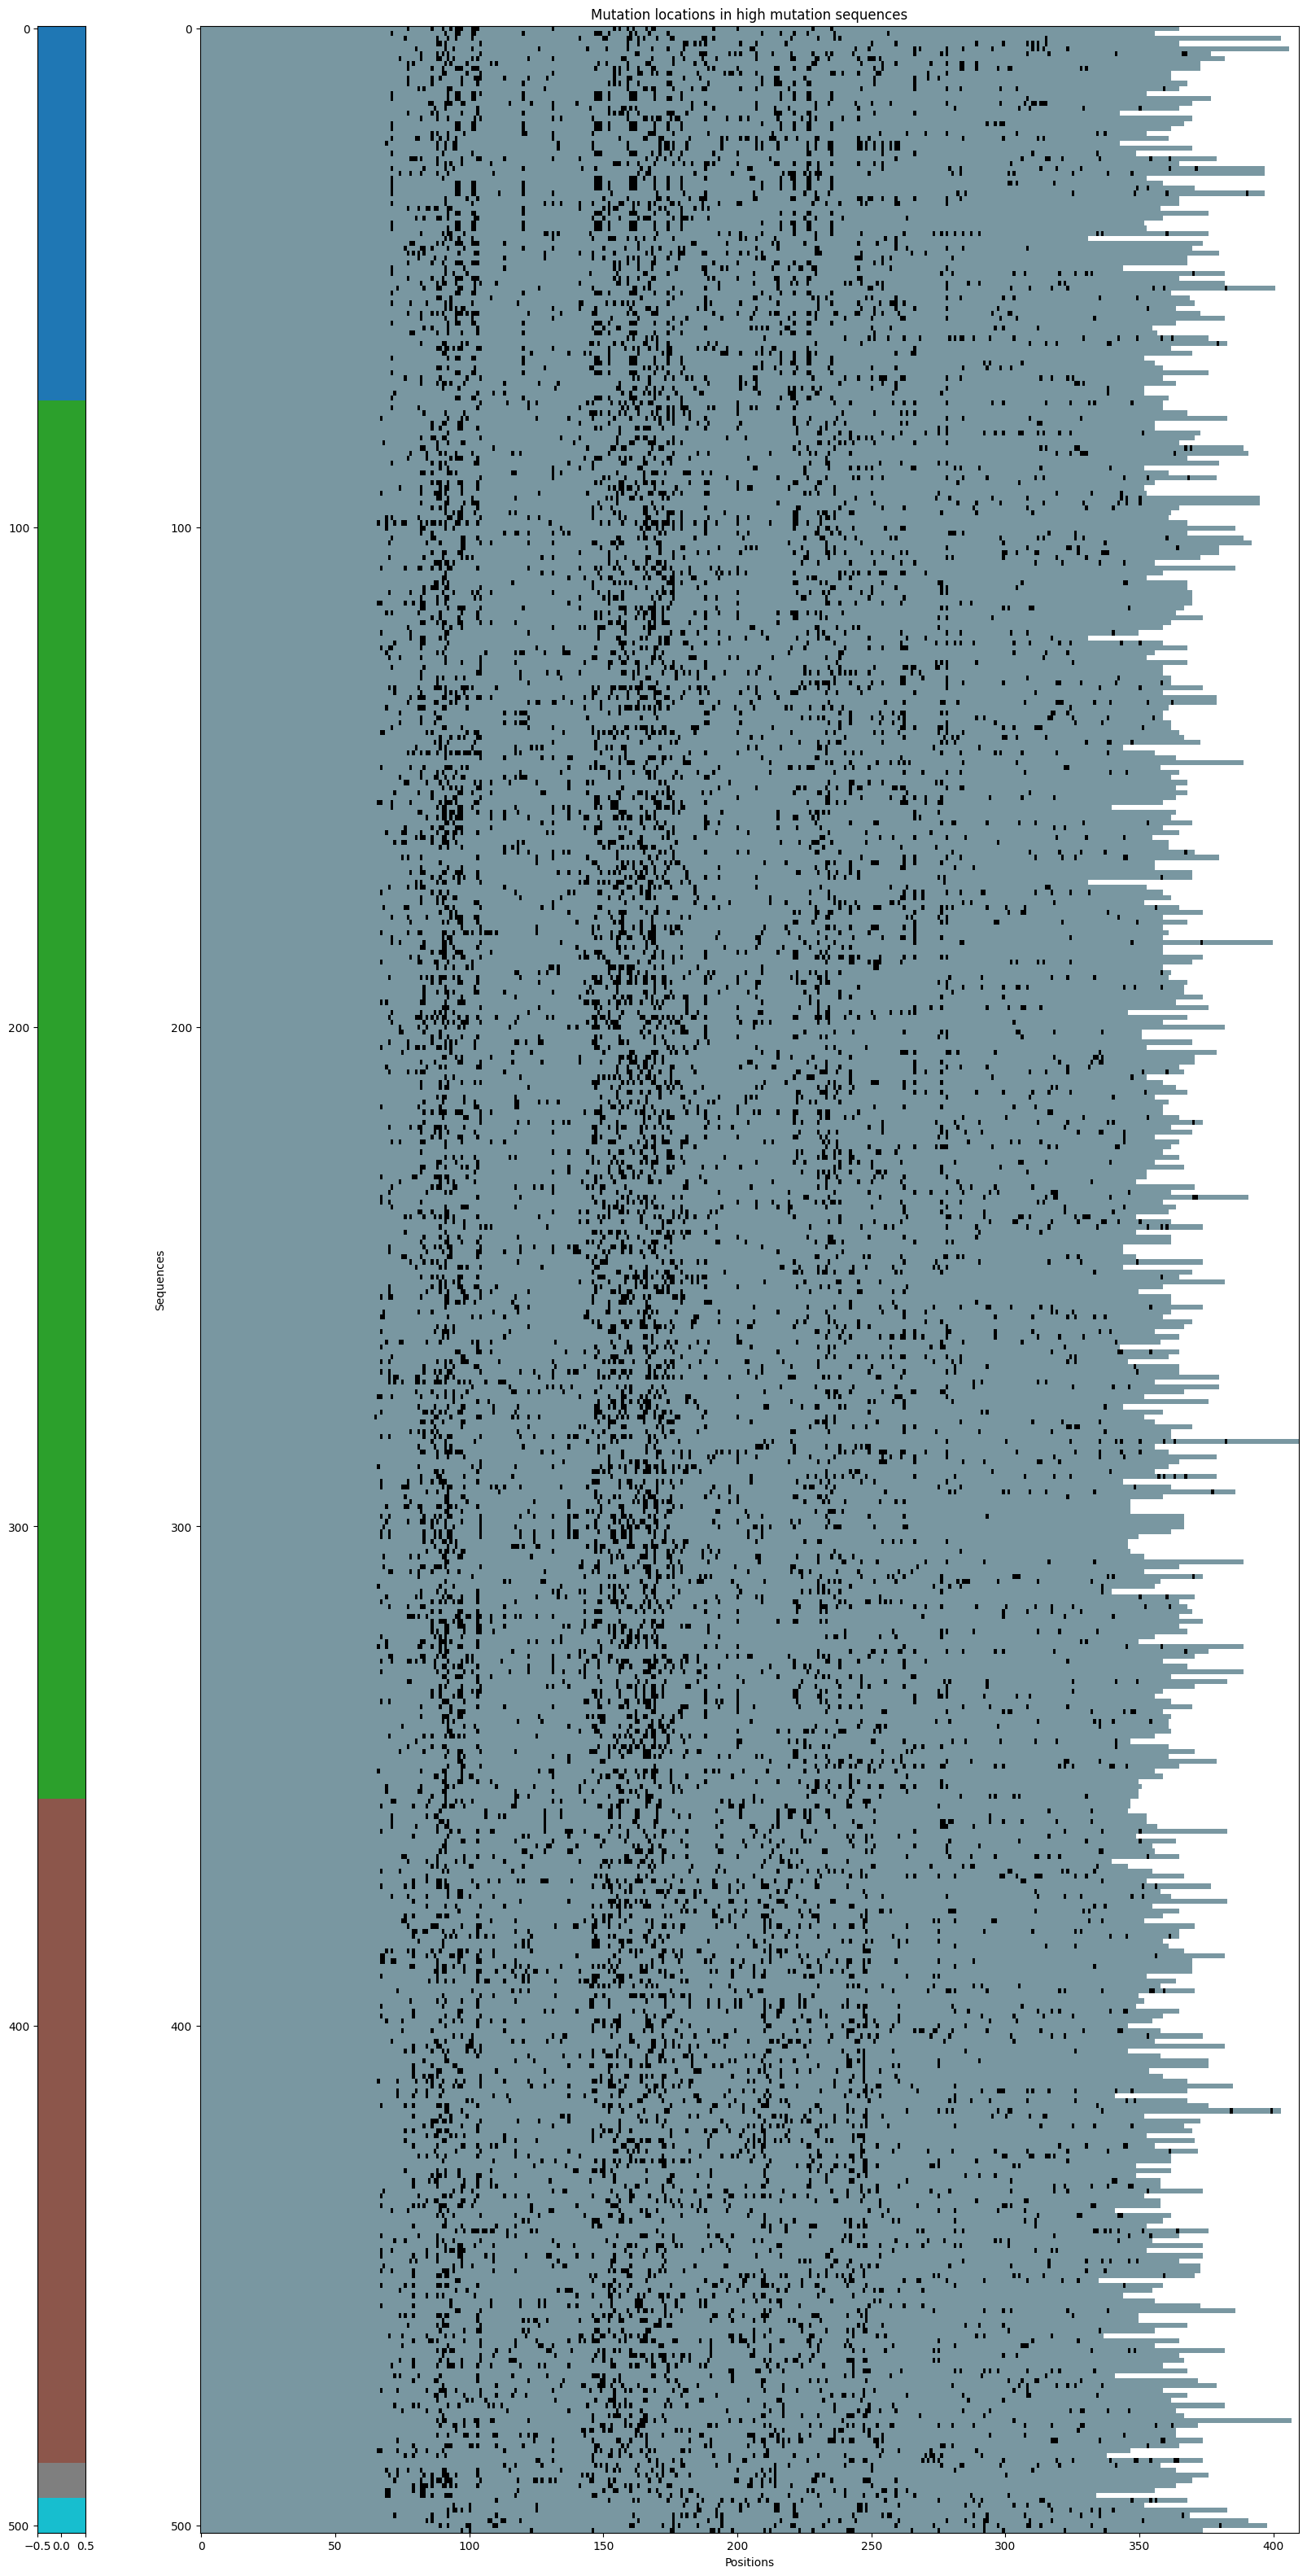

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sort by v_gene column
high_mut_df = high_mut_df.sort_values(by='v_gene')

# Find the maximum sequence length
max_len = high_mut_df['nt_mutations'].apply(len).max()

# Initialize a 2D NumPy array with NaNs for mutations
arr = np.full((len(high_mut_df), max_len), np.nan)

# Initialize a 2D NumPy array for v_gene
v_gene_arr = np.zeros((len(high_mut_df), 1))

# Map unique v_gene values to integers for coloring
unique_genes = high_mut_df['v_gene'].unique()
gene_to_int = {gene: i for i, gene in enumerate(unique_genes)}
v_gene_arr[:, 0] = high_mut_df['v_gene'].map(gene_to_int)

# Fill in the values for mutations
for i, row in enumerate(high_mut_df['nt_mutations']):
    arr[i, :len(row)] = row

# Create a 12x12 figure
fig = plt.figure(figsize=(20, 40))

# Define the grid layout
gs = GridSpec(1, 2, width_ratios=[0.5, 11.5])  # 0.5 inch for the first plot, 11.5 inches for the second

# Create the subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Plot v_gene information on ax1
ax1.imshow(v_gene_arr, cmap='tab10', aspect='auto')

# Plot mutation information on ax2
cmap = plt.cm.colors.ListedColormap(['lightblue', 'black'])
ax2.imshow(arr, cmap=cmap, aspect='auto')

# Use gray color for NaNs on ax2
ax2.imshow(np.isnan(arr), cmap='gray', alpha=0.3, aspect='auto')

plt.title("Mutation locations in high mutation sequences")
ax2.set_xlabel("Positions")
ax2.set_ylabel("Sequences")
plt.show()


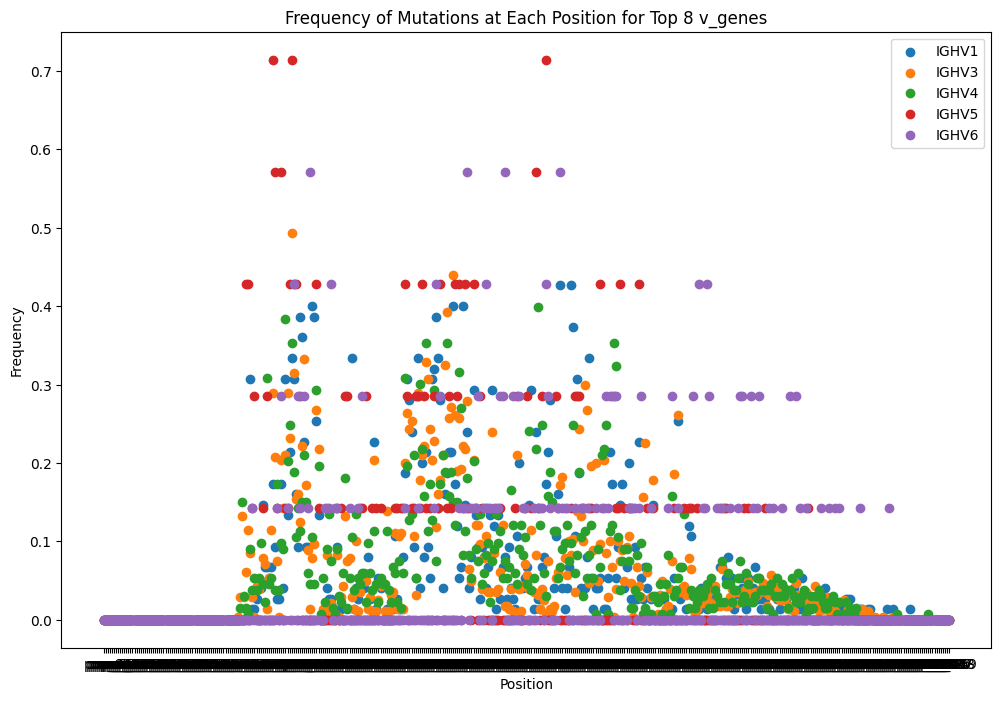

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample high_mut_df
# Replace this with your actual DataFrame

# 1. Determine the maximum sequence length
max_len = high_mut_df['nt_mutations'].apply(len).max()

# 2. Create an empty DataFrame with `v_gene` as index and columns for each position
columns = [f'pos_{i}' for i in range(max_len)]
agg_df = pd.DataFrame(columns=columns)

# Count the frequency of each v_gene
v_gene_counts = high_mut_df['v_gene'].value_counts()

# Keep only the 8 most frequent v_genes
top_v_genes = v_gene_counts.nlargest(8).index

# Filter the DataFrame to include only these
filtered_df = high_mut_df[high_mut_df['v_gene'].isin(top_v_genes)]

# 3. Iterate over each of the most frequent v_genes and fill the DataFrame
for v_gene, group in filtered_df.groupby('v_gene'):
    
    # Initialize a list to hold the sum of `True` values at each position
    sum_at_pos = [0]*max_len
    total_rows = len(group)
    
    # Sum up the `True` values at each position
    for nt_mutations in group['nt_mutations']:
        for i, val in enumerate(nt_mutations):
            sum_at_pos[i] += val
    
    # Calculate the frequency at each position
    freq_at_pos = [x / total_rows for x in sum_at_pos]
    
    # Append this to the DataFrame
    agg_df.loc[v_gene] = freq_at_pos

agg_df.index.name = 'v_gene'

# Plotting
plt.figure(figsize=(12, 8))
for v_gene in agg_df.index:
    plt.scatter(agg_df.columns, agg_df.loc[v_gene], label=v_gene)
    
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Frequency of Mutations at Each Position for Top 8 v_genes')
plt.legend()
plt.show()
